In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
import tensorflow as tf
import tensorflow.keras as k
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, AveragePooling2D, Flatten, Dropout

AttributeError: module 'numpy' has no attribute 'typeDict'

In [ ]:
df = pd.read_csv("train.csv")

In [3]:
diagnosis_binary = {
        0: 'No_DR',
        1: 'DR',
        2: 'DR',
        3: 'DR',
        4: 'DR'}

diagnosis_classes = {
    0: 'No_DR',
    1: 'Mild',
    2: 'Moderate',
    3: 'Severe',
    4: 'Proliferate_DR',
}


df["binary"] = df["diagnosis"].map(diagnosis_binary.get)
df["type"] = df["diagnosis"].map(diagnosis_classes.get)

In [4]:
df.head()

,id_code,diagnosis,binary,type
0,000c1434d8d7,2,DR,Moderate
1,001639a390f0,4,DR,Proliferate_DR
2,0024cdab0c1e,1,DR,Mild
3,002c21358ce6,0,No_DR,No_DR
4,005b95c28852,0,No_DR,No_DR


<Axes: ylabel='type'>

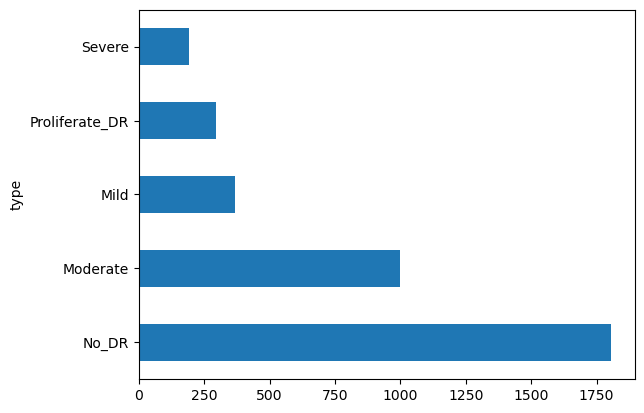

In [5]:
df['type'].value_counts().plot(kind='barh')

<Axes: ylabel='binary'>

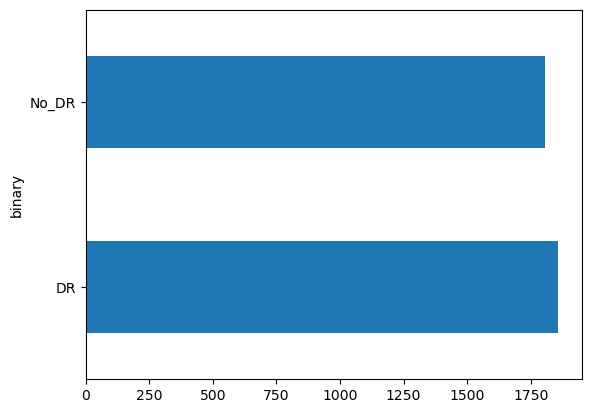

In [6]:
df['binary'].value_counts().plot(kind='barh')

In [8]:
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from sklearn.preprocessing import LabelBinarizer
#!pip install imutils
from imutils import paths
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

In [10]:
data = []
labels = []
width,height=224,224

imagePaths = list(paths.list_images('dataset'))

data = []
labels = []

for imagePath in imagePaths:
    label = imagePath.split(os.path.sep)[-2]   
    #image = load_img(imagePath, target_size=(width, height))
    image = load_img(imagePath)
    image = img_to_array(image)
    data.append(image)
    labels.append(label)

data = np.array(data, dtype="float32")
labels = np.array(labels)

lb = LabelBinarizer()
labels = lb.fit_transform(labels)

data, labels = shuffle(data, labels)

print(data.shape)
print(labels.shape)

(550, 224, 224, 3)
(550, 5)


In [11]:
data = data / 255.0

In [13]:
path_folder = "dataset"
class_name = os.listdir(path_folder)
class_name

['Mild', 'Moderate', 'NO_Dr', 'Proliferate_DR', 'Severe']

In [14]:
class_name = os.listdir(path_folder)
class_name.sort()
#class_name = class_name[:4] + class_name[20:23]
print(class_name)
image_data = []
label_data = []
count = 0
for folder in class_name:
    images = os.listdir(path_folder + "/" + folder)
    print("Loading Folder -- {} " .format(folder), "The Count of Classes ==> ",count)
    for img in images:
        image = cv2.imread(path_folder + "/" + folder + "/" + img)
        image = cv2.resize(image, (100, 100))
        
        image_data.append(image)
        label_data.append(count)
    count += 1
print("---- Done ----------- ")

['Mild', 'Moderate', 'NO_Dr', 'Proliferate_DR', 'Severe']
Loading Folder -- Mild  The Count of Classes ==>  0
Loading Folder -- Moderate  The Count of Classes ==>  1
Loading Folder -- NO_Dr  The Count of Classes ==>  2
Loading Folder -- Proliferate_DR  The Count of Classes ==>  3
Loading Folder -- Severe  The Count of Classes ==>  4
---- Done ----------- 


In [15]:
data = np.array(image_data)
data = data.astype("float32")
data = data/255.0

label = np.array(label_data)

In [16]:
print(data.shape)

(550, 100, 100, 3)


In [17]:
label_num = to_categorical(label, len(class_name))
label_num[100]

array([1., 0., 0., 0., 0.], dtype=float32)

In [18]:
x_img, y_img = shuffle(data, label_num)
x_train, x_test, y_train, y_test = train_test_split(x_img, y_img, train_size=0.8)

In [19]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((440, 100, 100, 3), (440, 5), (110, 100, 100, 3), (110, 5))

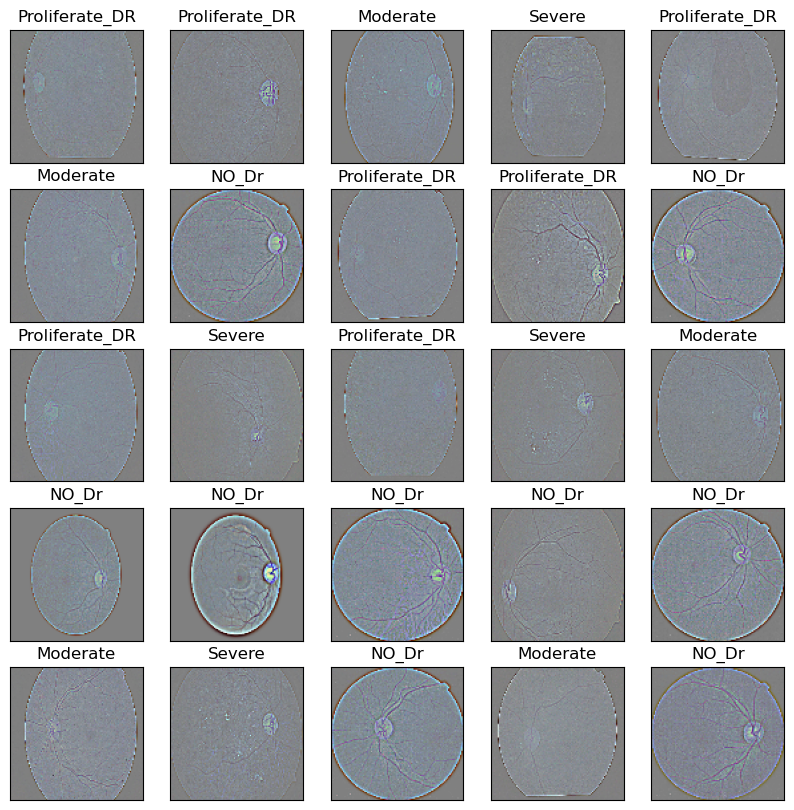

In [20]:
plt.figure(figsize=(10, 10))
for i in range(0, 25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i])
    plt.title(class_name[np.argmax(y_train[i])])

In [21]:
model = k.models.Sequential()

model.add(k.layers.Conv2D(16, (5, 5), activation="relu", input_shape=(100, 100, 3), padding="same"))
model.add(k.layers.AveragePooling2D((2, 2)))

model.add(k.layers.Conv2D(32, (4, 4), activation="relu",  padding="same"))
# model.add(k.layers.BatchNormalization())
model.add(k.layers.AveragePooling2D((2, 2)))


model.add(k.layers.Conv2D(64, (3, 3), activation="relu", padding="same"))
model.add(k.layers.AveragePooling2D((2, 2)))

model.add(k.layers.Conv2D(128, (2, 2), activation="relu", padding="same"))
model.add(k.layers.MaxPool2D((2, 2)))

model.add(k.layers.Flatten())

model.add(k.layers.Dense(256, activation="relu"))
# model.add(k.layers.BatchNormalization())
model.add(k.layers.Dropout(0.5))

model.add(k.layers.Dense(32, activation="relu"))
model.add(k.layers.Dropout(0.2))

model.add(k.layers.Dense(5, activation="softmax"))

model.compile(optimizer="adam", loss=k.losses.CategoricalCrossentropy(), metrics=["accuracy"])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 16)      1216      
                                                                 
 average_pooling2d (Average  (None, 50, 50, 16)        0         
 Pooling2D)                                                      
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 32)        8224      
                                                                 
 average_pooling2d_1 (Avera  (None, 25, 25, 32)        0         
 gePooling2D)                                                    
                                                                 
 conv2d_2 (Conv2D)           (None, 25, 25, 64)        18496     
                                                                 
 average_pooling2d_2 (Avera  (None, 12, 12, 64)        0

In [79]:
history = model.fit(x_train, y_train, epochs=150, validation_data=(x_test, y_test), validation_split=0.4)

Epoch 1/5
14/14 [==============================] - 16s 1s/step - loss: 0.1526 - accuracy: 0.9409 - val_loss: 6.1244 - val_accuracy: 0.4091
Epoch 2/5
14/14 [==============================] - 18s 1s/step - loss: 0.1096 - accuracy: 0.9477 - val_loss: 6.1805 - val_accuracy: 0.4455
Epoch 3/5
14/14 [==============================] - 26s 2s/step - loss: 0.1032 - accuracy: 0.9682 - val_loss: 5.6655 - val_accuracy: 0.4364
Epoch 4/5
14/14 [==============================] - 30s 2s/step - loss: 0.0943 - accuracy: 0.9659 - val_loss: 5.4367 - val_accuracy: 0.4273
Epoch 5/5
14/14 [==============================] - 38s 3s/step - loss: 0.0518 - accuracy: 0.9773 - val_loss: 5.7101 - val_accuracy: 0.4273


In [22]:
model.save('FINAL_model2.h5')
print('Model Saved')

Model Saved


1/1 [==============================] - 0s 177ms/step
Type Of DR ==> Mild


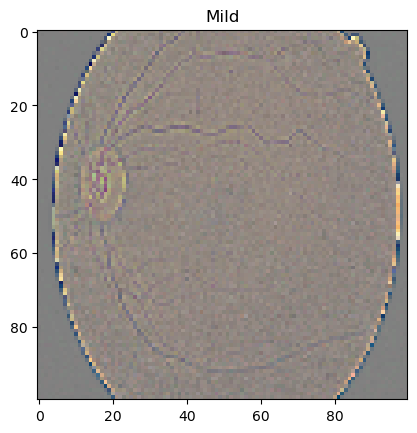

In [27]:
from tensorflow.keras.models import load_model
image = cv2.imread('UPLOAD/14.png')
image = cv2.resize(image, (100, 100))
new_image = np.reshape(image, [1, 100, 100, 3])
model=load_model('FINAL_model2.h5')
prediction = model.predict(new_image)[0]
new_prediction = class_name[np.argmax(prediction)]
# print("The Prediction is ==> ", new_prediction1)

print("Type Of DR ==>", new_prediction)

# ================== Show image And Label Prediction =================================

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.title(new_prediction)
plt.show()